In [2]:
from pathlib import Path

while Path.cwd().name != 'ambient':
    %cd ..

/mmfs1/gscratch/xlab/alisaliu/ambient/notebooks
/mmfs1/gscratch/xlab/alisaliu/ambient


In [3]:
import pandas as pd
from pathlib import Path
from utils.constants import id2label, label2id
from mturk.crowdworker_utils import read_batch, clean_batch, statistics_for_worker
from mturk.crowdworker_stats import compute_agreement_statistics, compute_acceptability_statistics, compute_committee_perf
import numpy as np
import ast
from scipy import stats
import math
import sys
np.set_printoptions(threshold=sys.maxsize)
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
batches_dir = Path('annotation/crowdworker_exp/batches')
dirs = [d for d in os.listdir(batches_dir) if (os.path.isdir(batches_dir / d) and d.startswith('batch_'))]
hits_per_annotator = Counter()

batch_dfs = []
for batch_dir in dirs:
    batch_df = pd.read_json(batches_dir / batch_dir / 'batch_results.jsonl', lines=True)
    batch_df['labels'] = [ast.literal_eval(row['labels']) for _, row in batch_df.iterrows()]
    batch_dfs.append(batch_df)

results_df = pd.concat(batch_dfs)
print(f'Number of examples annotated: {len(results_df.index)}')

Number of examples annotated: 542


In [12]:
compute_agreement_statistics(results_df)

{'ambiguous_kappa': 0.11736103121599217,
 'disambiguated_kappa': 0.6704091908237546}

In [13]:
compute_acceptability_statistics(results_df)

{'disambiguation_acceptability': 0.9673082798655668,
 'all_disambiguation_acceptability': 0.9368593685936859,
 'distractor_acceptability': 0.46562824506749734}

In [10]:
compute_committee_perf(results_df)['committee_perf']

0.8966789667896679

In [15]:
results_df.to_json('annotation/crowdworker_exp/annotation_results.jsonl', lines=True, orient='records')

# Appendix stuff

In [30]:
batches_dir = Path('annotation/crowdworker_exp/batches')
dirs = [d for d in os.listdir(batches_dir) if (os.path.isdir(batches_dir / d) and d.startswith('batch_'))]
hits_per_annotator = Counter()

batch_dfs = []
for batch_dir in dirs:
    batch_id = int(batch_dir.split('_')[-1])
    print(batch_id)
    batch_df = read_batch(batch_id)
    batch_dfs.append(batch_df)
    hits_per_annotator.update(batch_df.worker_id.value_counts().to_dict())

batch_df = pd.concat(batch_dfs)
print(f'Number of examples annotated: {len(results_df.index)}')

5039373
5025919
5040909
5024336
5041243
5040305
5040013
5026450
5027593
Number of examples annotated: 542


In [14]:
time_on_page = batch_df.time_on_page.tolist()
np.median(time_on_page)

67.6335

In [16]:
pay_statistics = {}
for worker_id, worker_df in batch_df.groupby('worker_id'):
    tot_examples = len(worker_df.index)
    tot_pay = tot_examples * 0.4
    tot_time = worker_df.time_on_page.sum()
    pay_statistics[worker_id] = {
        'total_examples': tot_examples, 
        'total_pay': tot_pay,
        'total_time': tot_time,
        'hourly_pay': tot_pay / (tot_time/60/60)
    }

<AxesSubplot:ylabel='Count'>

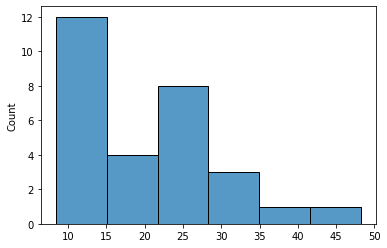

In [17]:
hourly_pays = [v['hourly_pay'] for k,v in pay_statistics.items()]
sns.histplot(hourly_pays)

In [18]:
np.median(hourly_pays)

19.13176616032009

In [20]:
len(batch_df.worker_id.value_counts())

29

In [27]:
set(batch_df.worker_id.tolist())

{'A002160837SWJFPIAI7L7',
 'A132MSWBBVTOES',
 'A1DMXEJGJY02E1',
 'A1ELPYAFO7MANS',
 'A1HKYY6XI2OHO1',
 'A1P3HHEXWNLJMP',
 'A26LOVXF4QZZCO',
 'A272X64FOZFYLB',
 'A2BK45LZGGWPLX',
 'A2C84POENS2UNY',
 'A2EDER9628S0A',
 'A2EJ7U3TZAKROG',
 'A2NAKIXS3DVGAA',
 'A2OFN0A5CPLH57',
 'A2T5CROJ0FWIJY',
 'A2TCX20FIMNWSS',
 'A2VO8C41JJIQY9',
 'A3135Y3RMFC3PK',
 'A320QA9HJFUOZO',
 'A38DXFI1TZA295',
 'A3GWRDHAURRNK6',
 'A3P9TM5PRYBH90',
 'A5TWD5QD99GZY',
 'A6KOTWP7N7RLU',
 'A9HQ3E0F2AGVO',
 'AKQAI78JTXXC9',
 'AQXRHIMQ7UK7O',
 'ATR6RB1RULOC0',
 'AWVLT2L5AP873'}

In [31]:
hits_per_annotator

Counter({'AKQAI78JTXXC9': 397,
         'A2NAKIXS3DVGAA': 467,
         'A9HQ3E0F2AGVO': 237,
         'A1HKYY6XI2OHO1': 315,
         'A2VO8C41JJIQY9': 326,
         'A38DXFI1TZA295': 321,
         'A5TWD5QD99GZY': 327,
         'A3P9TM5PRYBH90': 137,
         'A2EDER9628S0A': 161,
         'ATR6RB1RULOC0': 272,
         'A6KOTWP7N7RLU': 108,
         'A320QA9HJFUOZO': 182,
         'A2OFN0A5CPLH57': 102,
         'A2C84POENS2UNY': 101,
         'A2TCX20FIMNWSS': 26,
         'A1DMXEJGJY02E1': 335,
         'A2EJ7U3TZAKROG': 101,
         'AWVLT2L5AP873': 55,
         'A1P3HHEXWNLJMP': 69,
         'A272X64FOZFYLB': 6,
         'AQXRHIMQ7UK7O': 252,
         'A3GWRDHAURRNK6': 126,
         'A1ELPYAFO7MANS': 68,
         'A2BK45LZGGWPLX': 57,
         'A26LOVXF4QZZCO': 147,
         'A2T5CROJ0FWIJY': 150,
         'A132MSWBBVTOES': 1,
         'A3135Y3RMFC3PK': 23,
         'A002160837SWJFPIAI7L7': 9})